In [1]:
### Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


so we have a very  small dataset with us in which we have to find the cluster that means this is the unsupervised learning problem .
we have 0 null values in our dataset 

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


    1.so as we can see in our dataset we have more than 50% population having age less than 36 .
    2.we have more than 50% population whose having there annual income below 65k$


<AxesSubplot:xlabel='Gender', ylabel='count'>

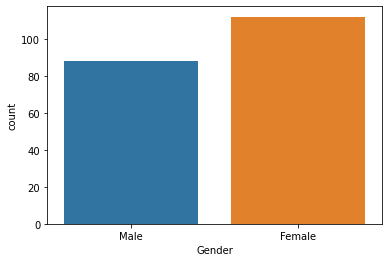

In [6]:
sns.countplot(data = df,x ='Gender')

as you can see we have more number of feamle customers which is very obvious in mall shopping case.

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

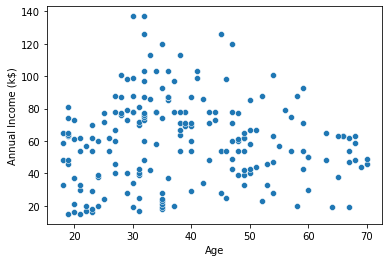

In [7]:
sns.scatterplot(data = df,x = 'Age',y = 'Annual Income (k$)')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

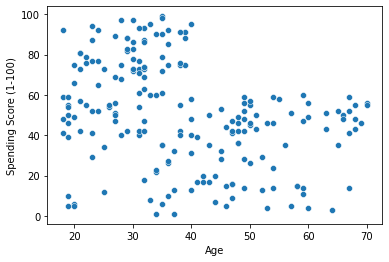

In [8]:
sns.scatterplot(data = df,x = 'Age',y = 'Spending Score (1-100)')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

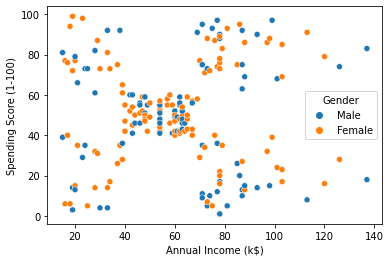

In [11]:
sns.scatterplot(data = df,x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue = 'Gender')

from Spending Score vs Annual income we can clearly see some clusters in our dataset

    1.low income , low spending
    2.low income , high spending
    3.avg incoome , avg spending'
    4.high income , high spending
    5.high income, low spending

In [14]:
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
X = df.iloc[:, [3,4]]

In [15]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [16]:
# Calculating WCSS values for 1 to 10 clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_model.fit(X)
    wcss.append(kmeans_model.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


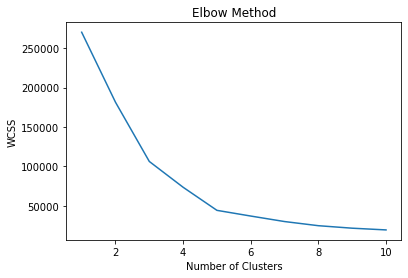

In [17]:
# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

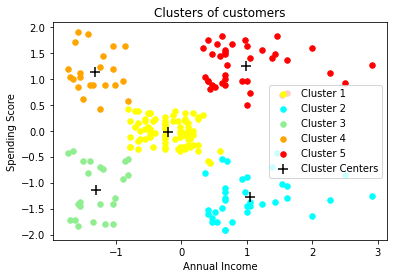

In [20]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Clustering - Observation

a. High Income, High Spending Score (Cluster 5) - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.

b. High Income, Low Spending Score (Cluster 2) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.

c. Average Income, Average Spending Score (Cluster 1) - Can target these set of customers by providing them with Low cost EMI's etc.

d. Low Income, High Spending Score (Cluster 4) - May or may not target these group of customers based on the policy of the mall.

e. Low Income, Low Spending Score (Cluster 3) - Don't target these customers since they have less income and need to save money.